# Clifford Randomized Benchmarking (RB)

In [10]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [1]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

## Set IQM Token if using Resonance.

In [2]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Randomized Benchmarking Configuration

NB: Clifford RB is executed by default with Interleaved RB !

In [3]:
from iqm.benchmarks.randomized_benchmarking.clifford_rb.clifford_rb import *

/opt/anaconda3/envs/env-iqm-benchmarks/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
EXAMPLE_CRB = CliffordRBConfiguration(
    qubits_array=[[0,1]],#,[3,4],[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(6)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
)

## Run the experiment

In [5]:
benchmark_clifford_rb = CliffordRandomizedBenchmarking(backend, EXAMPLE_CRB)
run_clifford_rb = benchmark_clifford_rb.run()

2025-02-07 11:11:24,413 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-02-07 11:11:24,414 - iqm.benchmarks.logging_config - INFO - Executing sequential Clifford RB on qubits [0, 1]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63]
2025-02-07 11:11:24,414 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-02-07 11:11:24,490 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-02-07 11:11:24,645 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-02-07 11:11:24,955 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-02-07 11:11:25,573 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-02-07 11:11:28,975 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-02-07 11:11:34,572 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 1]
2025-02-07

## Perform the analysis

In [6]:
result_clifford_rb = benchmark_clifford_rb.analyze()

2025-02-07 11:11:36,739 - iqm.benchmarks.logging_config - INFO - Post-processing sequential RB for qubits [[0, 1]]


2025-02-07 11:11:36,743 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 1
2025-02-07 11:11:36,746 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 3
2025-02-07 11:11:36,750 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 7
2025-02-07 11:11:36,753 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 15
2025-02-07 11:11:36,756 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 31
2025-02-07 11:11:36,760 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 63


In [7]:
run_clifford_rb.dataset.attrs

{'session_timestamp': '20250207-111119',
 'execution_timestamp': '20250207-111119',
 'backend_configuration_name': 'fakeapollo',
 'backend_name': 'IQMFakeApolloBackend',
 'benchmark': 'clifford_rb',
 'shots': 256,
 'max_gates_per_batch': None,
 'calset_id': None,
 'routing_method': 'sabre',
 'physical_layout': 'fixed',
 'qubits_array': [[0, 1]],
 'sequence_lengths': [1, 3, 7, 15, 31, 63],
 'num_circuit_samples': 25,
 'parallel_execution': False,
 0: {'qubits': [0, 1],
  'depth_1': {'time_circuit_generation': 10.158143997192383,
   'time_submit': 0.009042978286743164,
   'time_retrieve': 0.18927907943725586,
   'all_job_metadata': {'batch_job_1': {'job_id': '6b890341-56cc-4a06-ba73-fcc5f9469d4e',
     'backend': 'aer_simulator',
     'status': 'job has successfully run',
     'circuits_in_batch': None,
     'shots': None,
     'timestamps': None}}},
  'depth_3': {'time_circuit_generation': 10.158143997192383,
   'time_submit': 0.0793600082397461,
   'time_retrieve': 0.000531911849975585

In [8]:
result_clifford_rb.observations

[BenchmarkObservation(name='avg_gate_fidelity', value=0.952649089072931, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1]), uncertainty=0.0011528292539657247)]

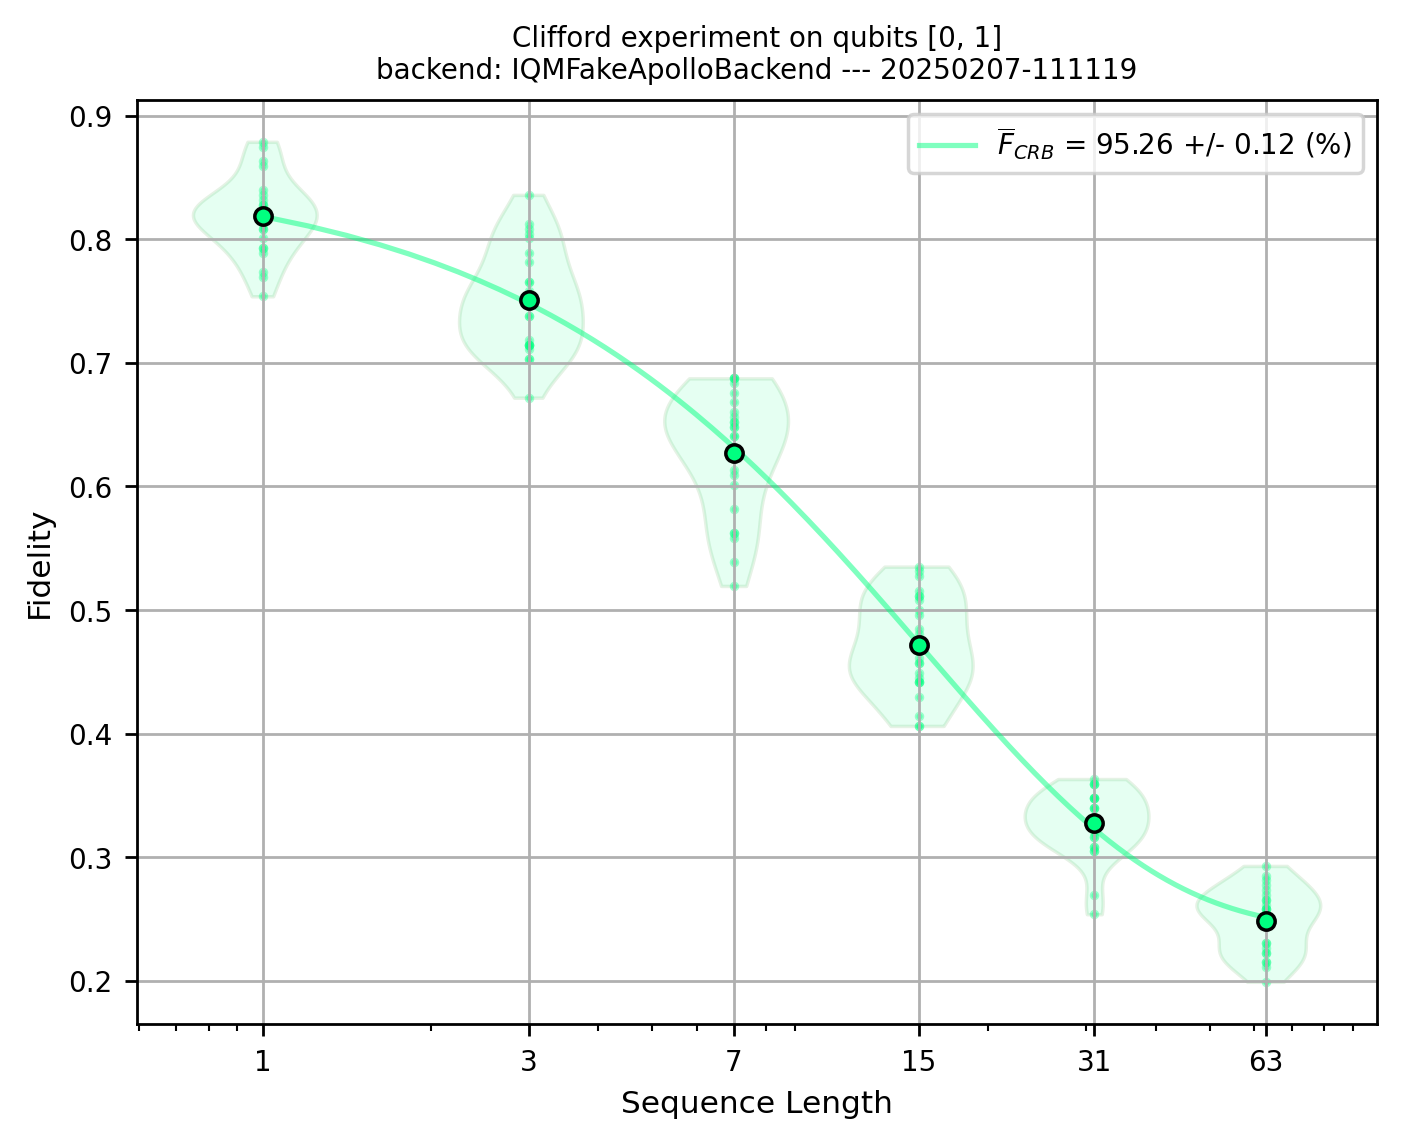

In [9]:
for plot in result_clifford_rb.plots.values():
    display(plot)